In [4]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO, StringIO
import os
import numpy as np
import cv2
import PIL
import cv2

In [5]:
cam = cv2.VideoCapture(0)
ret, img = cam.read()
cv2.destroyAllWindows() 
cam.release()

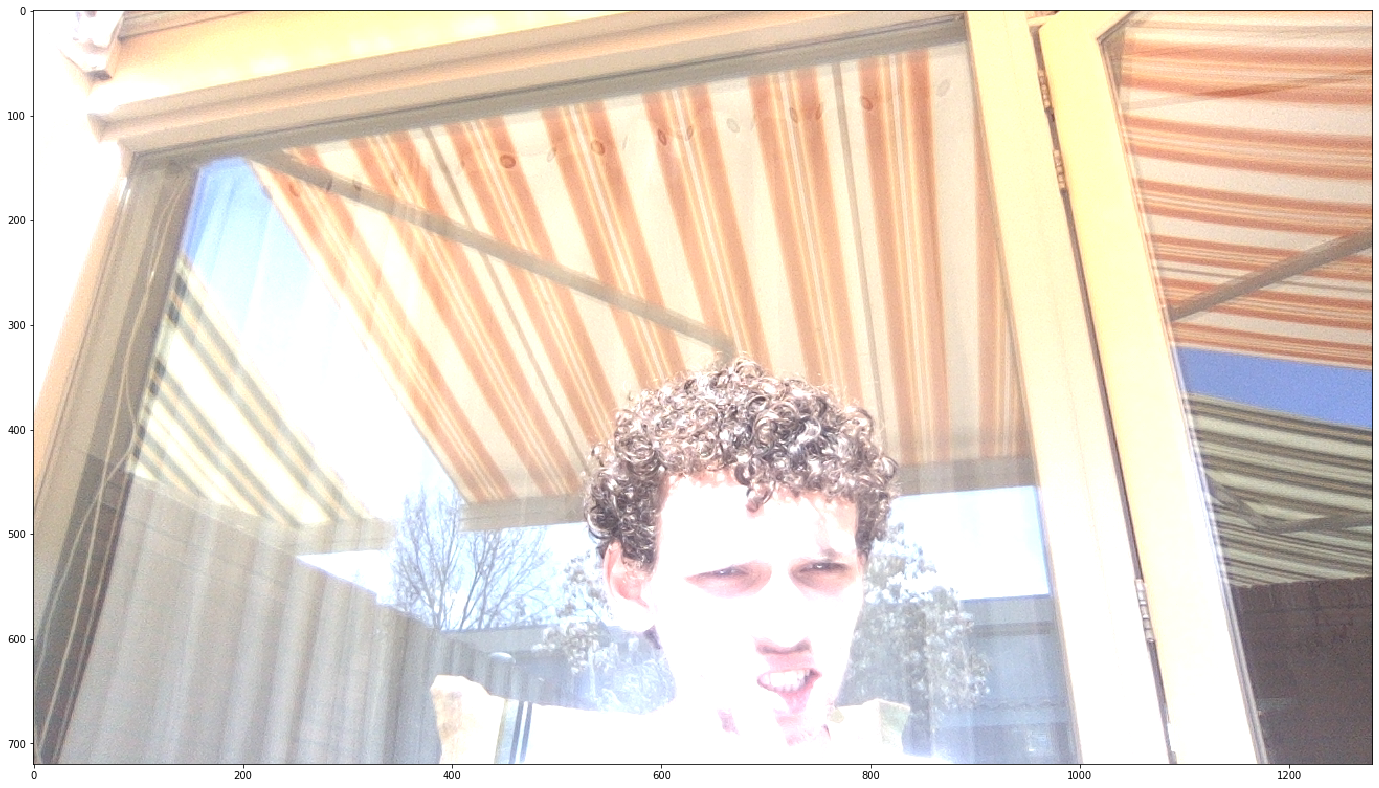

In [6]:
from matplotlib.pyplot import imshow
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = (24, 16)
imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [7]:
f = BytesIO()
PIL.Image.fromarray(img).save(f, 'png')
data = f.getvalue()

In [20]:
ENDPOINT = 'https://westeurope.api.cognitive.microsoft.com/face/v1.0/detect'
#KEY = '2d0523e810c24bd5b7fd4448fbf71c67'
KEY = '5d4e91c5581544229d0cdc2bc73d89e1'


params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,emotion,smile,facialHair'
}

headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': KEY
}

In [21]:
response = requests.post(data=data,url=ENDPOINT,headers=headers,params=params)

In [22]:
print(response)

<Response [200]>


In [23]:
response.json()

[{'faceId': '45023700-b091-48c7-bd9f-407a653be4b6',
  'faceRectangle': {'top': 488, 'left': 612, 'width': 205, 'height': 205},
  'faceAttributes': {'smile': 0.569,
   'gender': 'male',
   'age': 24.0,
   'facialHair': {'moustache': 0.1, 'beard': 0.1, 'sideburns': 0.1},
   'emotion': {'anger': 0.027,
    'contempt': 0.008,
    'disgust': 0.077,
    'fear': 0.0,
    'happiness': 0.569,
    'neutral': 0.314,
    'sadness': 0.002,
    'surprise': 0.003}}}]

In [24]:
from matplotlib.patches import Polygon
from matplotlib.pyplot import gcf, gca

In [25]:
?isinstance

In [26]:
%matplotlib inline

{'gender': 'male', 'age': 24.0, 'anger': 0.027, 'contempt': 0.008, 'disgust': 0.077, 'fear': 0.0, 'happiness': 0.569, 'neutral': 0.314, 'sadness': 0.002, 'surprise': 0.003}


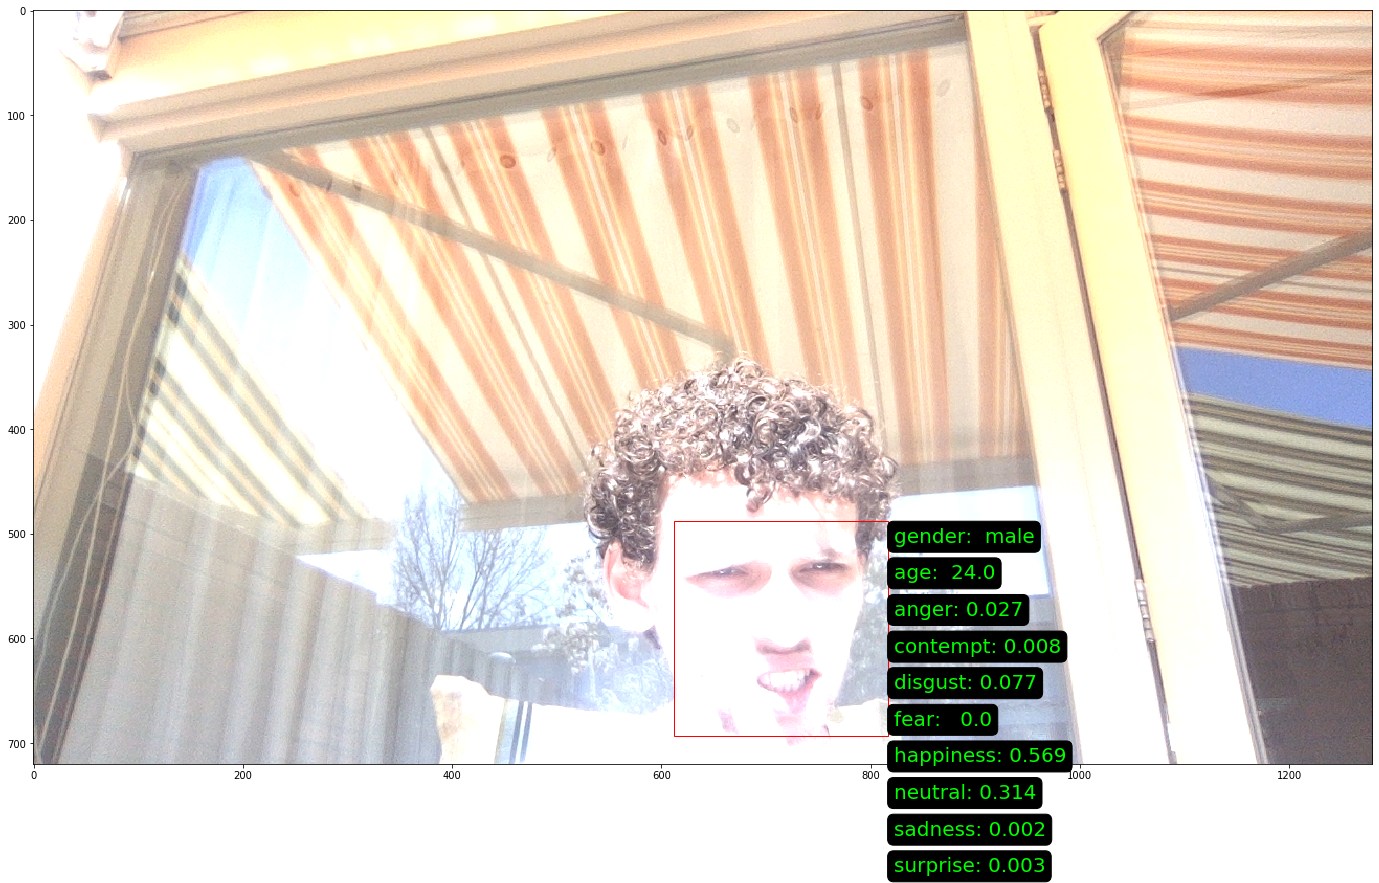

In [28]:
rcParams['figure.figsize'] = (24, 16)
ax = imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for face in response.json():
    
    rect = face['faceRectangle']
    fattr = face['faceAttributes']
    
    left, top, width, height = rect['left'], rect['top'], rect['width'], rect['height']
    
    path = [[left, top], [left + width, top], 
            [left + width, top + height], [left, top + height]]
    
    ax.axes.add_patch(Polygon(path, edgecolor='red', facecolor='none'))
    
    disp = {
            'gender': fattr['gender'],
            'age': fattr['age']
           }
    
    props = dict(boxstyle='round', facecolor='black', alpha=1)
    disp.update(fattr['emotion'])
    
    print(disp)
    for i, k in enumerate(disp):
        ax.axes.text(left+width+5, top + 20 + 35*i, "{:>0}: {:>5}".format(k, disp[k]),
                     color='lime', fontsize=20, backgroundcolor='black', bbox=props)